## Challenge WolfDen AI Internship Program

In this notebook, we explore the application of machine learning techniques to performance of horses in horse races. Horse racing is a popular sport with a long history, and predicting race outcomes accurately can be challenging due to various factors such as the performance of the horses, track conditions, jockey skills, and more.

The goal of this project is to develop predictive model that can forecast the RSR (Rating Standardized over Races) of horses in races. We will use a dataset containing detailed information about horse races over a period of time, including features such as horse age, weight of the horse, race tracks, past performance, and more

The report is sturctured in the following way

1. Importing the resources
2. Some Initial Insights into Data 
3. Cleaning of the data
4. Looking for a feature set to build a suitable model
5. Choosing a suitable model for the problem

### Reason for choosing Option B
I've chosen Option B because I believe it offers the best opportunity to accurately assess horse performance through predicting the Final RSR (Rating Standardized over Races). The dataset appears rich with detailed information about horse races over a 3-day period, which lends itself well to modeling the factors that contribute to a horse's RSR.

By focusing on predicting the Final RSR, we can delve deep into understanding the nuances of horse performance beyond just race outcomes. This approach allows us to capture various aspects such as horse characteristics, past performance metrics, jockey expertise, and track conditions, which all play crucial roles in determining a horse's overall performance.

# 1. Importing necessary resources 

In this report, we will be using Python language for the analysis of data, processing of data and training the machine learning models. For this purpose we will be using some of the libraries provided by Python as mentioned below and in the code as well

    1. Pandas (To import data from csv file and process it)
    2. Seaborn (Helpful in visualising the data at hand)
    3. Numpy (To apply some mathematical functions to data or subsets of data)
    4. sklearn (To import necessary modules for training and evaluation of ML models)

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 2. Some Initial Insights into data
In this section we will perform some initial insights into the data at hand. This section contains code wise explaination of the steps performed to achieve this task

## 2.1 Reading the data into CSV file
The first step is to read the data into a dataframe using the pandas library. The first few rows of the data are displayed below as well. Moreover the data types of all the coloumns in the data set are also represented.

In [113]:
data = pd.read_csv("data.csv") 
data.head() # Displaying first few rows of data

,Date,Track,RaceNumber,HorseNumber,HorseName,Weight,RSRLastRun,Barrier,Jockey,Odds,Trainer,RunsFromSpell,DaysSinceLastRun,LastStartFinishPosition,Distance,Age,Starts,FinishPosition,RSR
0,7/11/2023,Ascot,1,1,Go Go Grommet,58.5,68.133333,3,Madi Derrick,3.1,Tiarnna Robertson,0,110.0,9.0,1000,4,5,3,76.975
1,7/11/2023,Ascot,1,2,Bayezid,59.0,72.825000,2,Jarrad Noske,5.0,Tiarnna Robertson,3,13.0,4.0,1000,4,9,1,83.700
2,7/11/2023,Ascot,1,3,Deep Point,59.0,64.000000,4,Clinton Porter,12.0,C & M Gangemi,0,90.0,8.0,1000,4,8,6,75.175
3,7/11/2023,Ascot,1,4,Rockaria,58.5,65.350000,1,S Parnham,13.0,T M Wolfe,5,19.0,5.0,1000,4,7,4,75.050
4,7/11/2023,Ascot,1,5,Dreamers Never Die,57.5,61.495833,5,Chris Parnham,3.3,Luke Fernie,0,143.0,8.0,1000,3,3,5,74.250


In [114]:
data.dtypes

Date                        object
Track                       object
RaceNumber                   int64
HorseNumber                  int64
HorseName                   object
Weight                     float64
RSRLastRun                 float64
Barrier                      int64
Jockey                      object
Odds                       float64
Trainer                     object
RunsFromSpell                int64
DaysSinceLastRun           float64
LastStartFinishPosition    float64
Distance                     int64
Age                          int64
Starts                       int64
FinishPosition               int64
RSR                        float64
dtype: object

From the above explaination we can see that data has both numerical variables and some categorical variables as well. To summarise, following are the categorical variables in the dataset

__Date__: Represents the date of the race, a categorical value.

__Track__: Represents the track where the race took place, a categorical value.

__HorseName__: Represents the name of the horse, a categorical value.

__Jockey__: Represents the name of the jockey riding the horse, a categorical value.

__Trainer__: Represents the name of the trainer of the horse, a categorical value.

Some of these categorical variables will be encoded to help building a Machine learning model

## 2.2 Dealing with NULL values
Before we move forward with the training of the Machine Learning model, it is important to clean the data first. The first step in cleaning the data set would be to take care of the null values in the data set. The following line of code calculates the null values in each coloumn


In [115]:
null_values = data.isnull().sum()
print(null_values)

Date                         0
Track                        0
RaceNumber                   0
HorseNumber                  0
HorseName                    0
Weight                       0
RSRLastRun                 242
Barrier                      0
Jockey                       5
Odds                         0
Trainer                      0
RunsFromSpell                0
DaysSinceLastRun           130
LastStartFinishPosition    130
Distance                     0
Age                          0
Starts                       0
FinishPosition               0
RSR                          0
dtype: int64


We can drop the Null values in the coloumn jockey as they are very less and will have negligible impact on the analysis. However, the NULL values present in the coloumns "RSRLastRun", "DaysSinceLastRun" and "LastStartFinishPosition" can not be dropped simply and would require further analysis.

In [116]:
data.dropna(subset=['Jockey'], inplace=True)

To remove the NULL values we need to study the distributions of these coloumns so that NULL values can be replaced in a meaningful way. Dropping the NULL values straigh away may vary the distribution of the data and thus a further analysis of the data is required before replacing these NULL values

The below section of the code displays distribution of the coloumns with NULL values. We will analyse these distributions to move forward with cleaning NULL values.

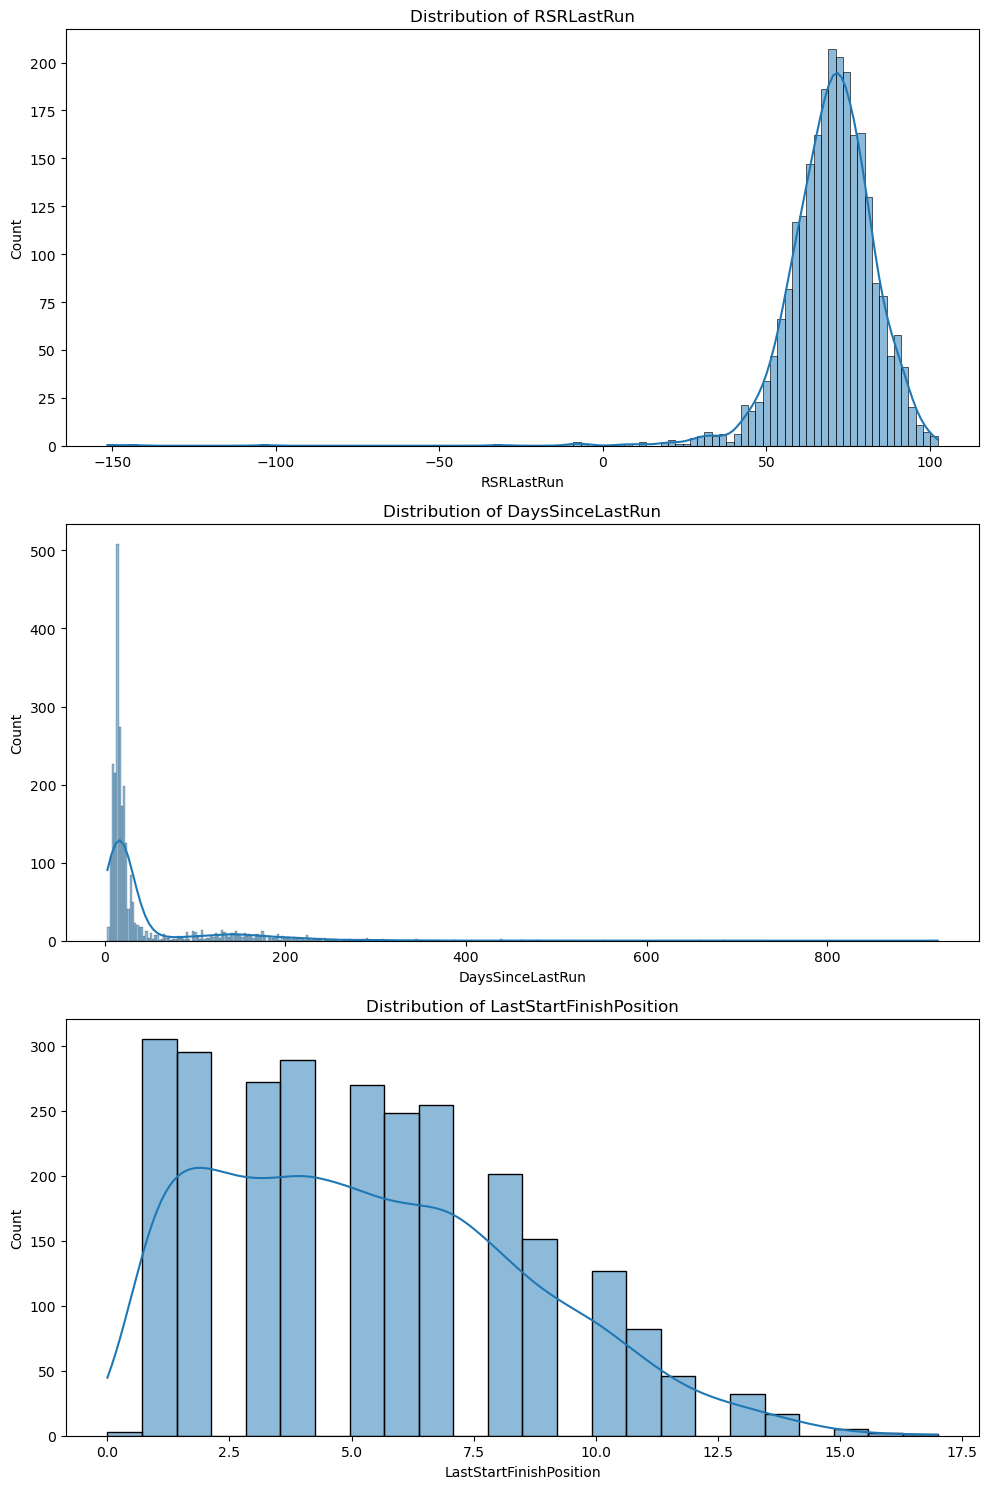

In [85]:
# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the distribution of RSRLastRun
sns.histplot(data['RSRLastRun'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of RSRLastRun')

# Plot the distribution of DaysSinceLastRun
sns.histplot(data['DaysSinceLastRun'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of DaysSinceLastRun')

# Plot the distribution of LastStartFinishPosition
sns.histplot(data['LastStartFinishPosition'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of LastStartFinishPosition')

# Adjust layout
plt.tight_layout()
plt.show()

### 2.2.1 Analysis of Distributions

#### Distribution of RSR Last run:
The first plot above shows the distribution of the values in the subject coloumn. As we can see, that the distribution of RSRLastRun is a skewed symmetric distribution. However, from the distribution, it is quite evident that the skewness is due to the presence of outliers in the data. Hence, to get a correct picture of the distribution we would need to deal with outliers and then proceed forward

#### Distribution of Days since last run:
The second plot above shows the distribution of the values in the subject coloumn. As we can see, that the distribution of DaysSinceLastRun is a skewed distribution. However, from the distribution, it can be thought that the skewness may be due to the presence of outliers in the data. Hence, to get a correct picture of the distribution we would need to deal with outliers and then proceed forward

#### Distribution of Last Finish Position:
The third plot in the figure above shows the distribution of the LastFinishPosition coloumn. The distribution seems to be quite uniform and no outliers are observed. A method like forward filling could be a suitable method to replace the null values to retain this original distribution. However, we would make a final decision after analysing the outliers in this coloumn as well.

### 2.2.2 Dealing with Outliers
In this section of the report, we will deal with outliers present in the some of the major coloumns in the data. We will first view the summary statistics of the data and then will decide which coloumns to remove the outliers from

In [117]:
data.describe()

,RaceNumber,HorseNumber,Weight,RSRLastRun,Barrier,Odds,RunsFromSpell,DaysSinceLastRun,LastStartFinishPosition,Distance,Age,Starts,FinishPosition,RSR
count,2730.000000,2730.000000,2730.000000,2489.000000,2730.000000,2730.000000,2730.000000,2600.000000,2600.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,4.746886,6.642125,56.806593,69.702954,5.656777,24.577143,3.102564,44.452308,5.366154,1401.357509,4.869231,16.683516,5.650183,68.807842
std,2.475834,4.115916,2.421836,14.592428,3.465550,33.477932,3.755796,69.811878,3.212340,404.865283,1.505616,15.053545,3.458010,14.658553
min,1.000000,1.000000,50.000000,-151.453662,1.000000,1.300000,0.000000,3.000000,0.000000,800.000000,2.000000,0.000000,1.000000,-110.424997
25%,3.000000,3.000000,55.000000,62.900000,3.000000,5.500000,1.000000,13.000000,3.000000,1100.000000,4.000000,5.000000,3.000000,62.044231
50%,5.000000,6.000000,57.000000,70.824999,5.000000,12.000000,2.000000,17.000000,5.000000,1300.000000,5.000000,13.000000,5.000000,70.404762
75%,7.000000,9.000000,58.500000,78.100000,8.000000,26.000000,4.000000,30.000000,8.000000,1600.000000,6.000000,24.000000,8.000000,78.058333
max,10.000000,24.000000,71.500000,102.300000,23.000000,201.000000,71.000000,922.000000,17.000000,3200.000000,12.000000,95.000000,22.000000,107.100000


Now we will first deal with the outliers in the following coloumns as the distributions can be affected by the presence of the outliers in these coloumns majorly
   
    1. RSRLastRun
    2. DaysSinceLastRun
    3. LastStartFinishPosition
    4. RSR
  
The following box plots contain show the distribution of the above mentioned coloumns with IQR and thresholds also mentioned. We will also count the outliers present in the data and remove the outliers accordingly

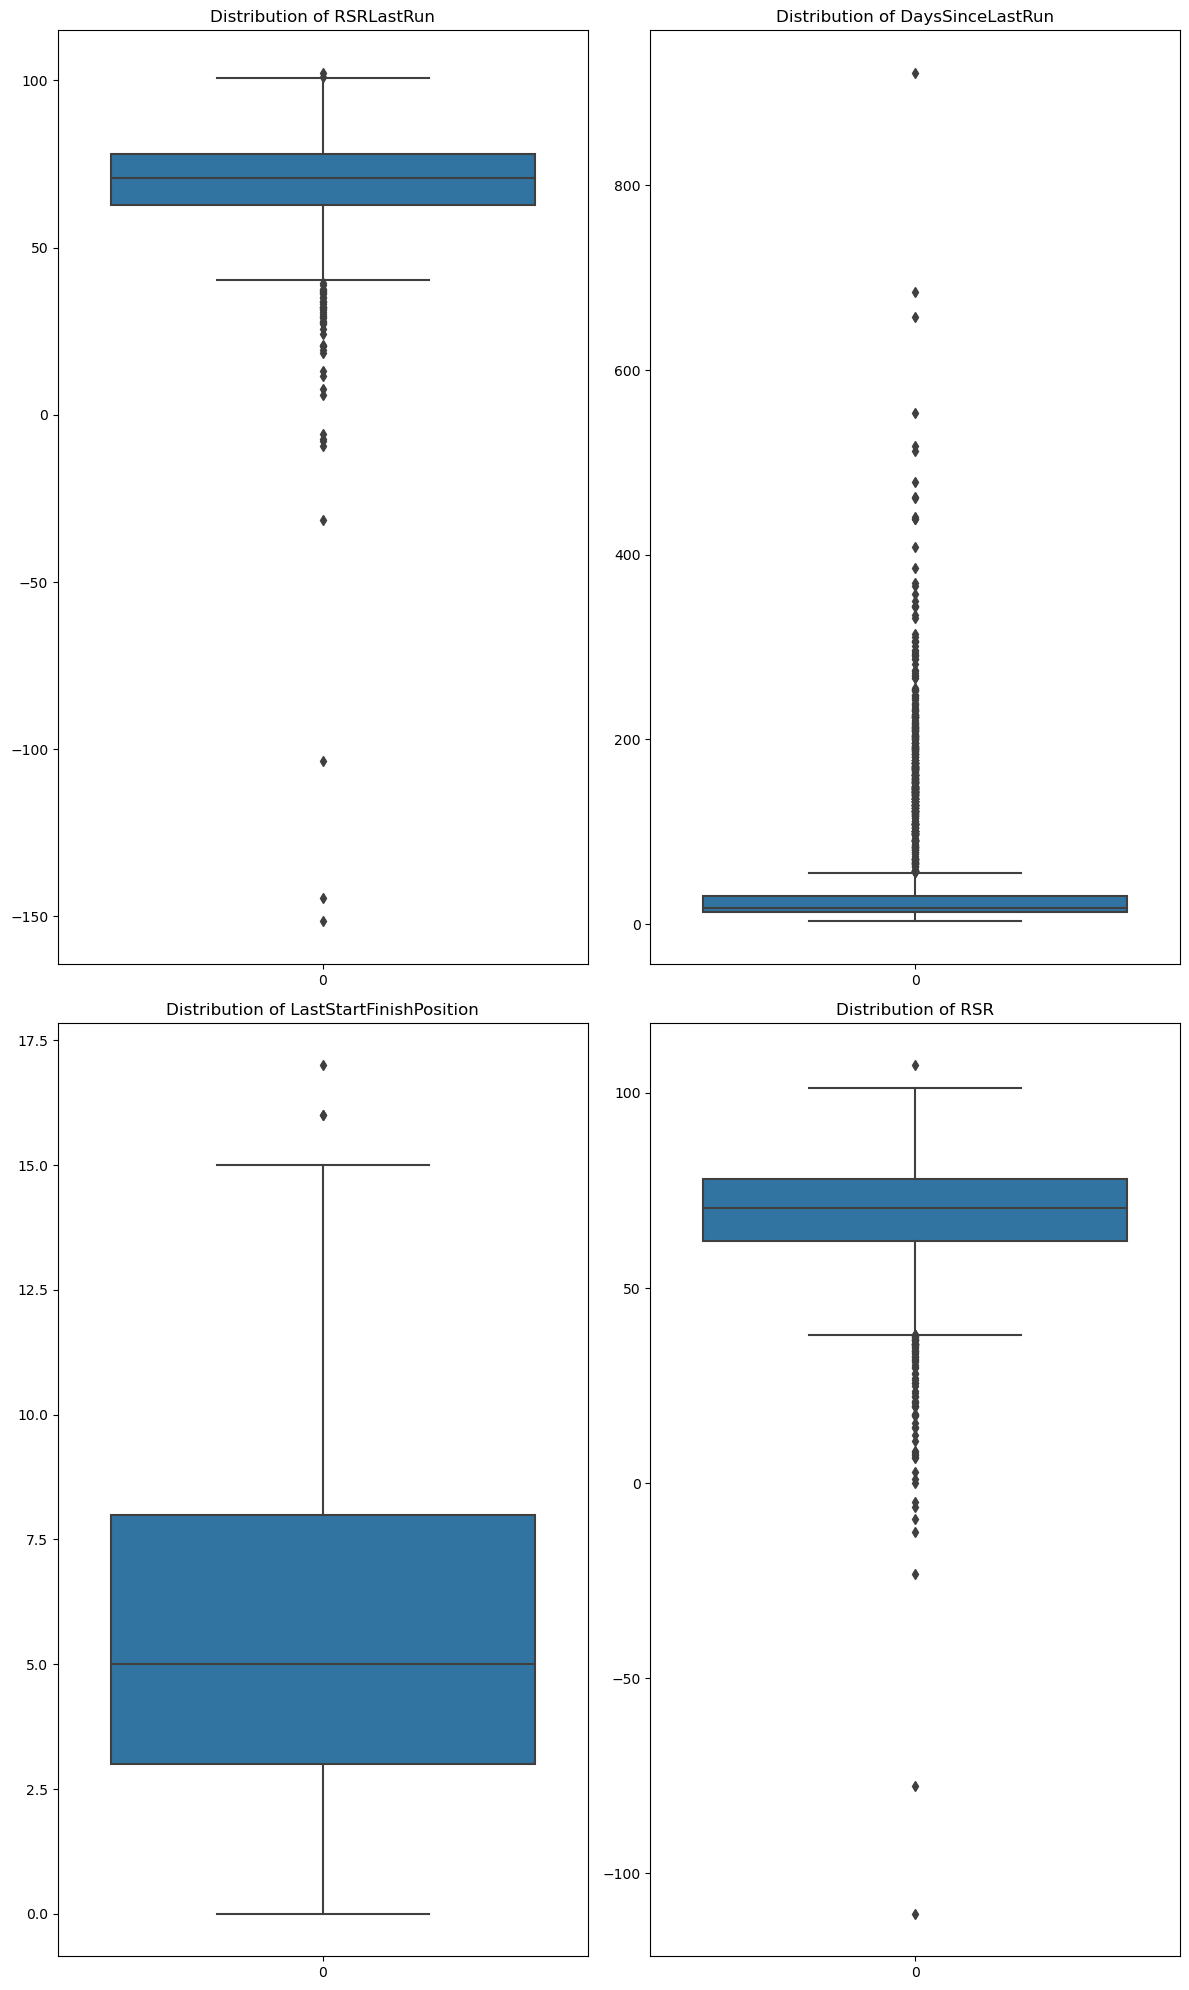

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(12, 20))

# Box plot for RSRLastRun
sns.boxplot(data['RSRLastRun'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of RSRLastRun')

# Box plot for DaysSinceLastRun
sns.boxplot(data['DaysSinceLastRun'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of DaysSinceLastRun')

# Box plot for LastStartFinishPosition
sns.boxplot(data['LastStartFinishPosition'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of LastStartFinishPosition')

# Box plot for Weight
sns.boxplot(data['RSR'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of RSR')

# Adjust layout
plt.tight_layout()
plt.show()

The following piece of code defines a function that gives a number of values that are considered as outliers. We will remove the outliers straight away for the coloumns that have relatively less outliers. As for the other coloumn(s), outliers will be removed after some analysis.

In [88]:
# Define the column for which you want to deal with outliers

def number_of_outliers(coloumn_name):
    # Calculate quartiles
    Q1 = np.percentile(data[column_name].dropna(), 25)
    Q3 = np.percentile(data[column_name].dropna(), 75)
    IQR = Q3 - Q1

    # Define the threshold for identifying outliers
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((data[column_name] < lower_threshold) | (data[column_name] > upper_threshold)).sum()
    return num_outliers

column_name = 'RSRLastRun'
num_outliers = number_of_outliers(column_name)
print("\nNumber of outliers in RSRLastRun:", num_outliers)

column_name = 'DaysSinceLastRun'
num_outliers = number_of_outliers(column_name)
print("\nNumber of outliers in DaysSinceLastRun:", num_outliers)

column_name = 'LastStartFinishPosition'
num_outliers = number_of_outliers(column_name)
print("\nNumber of outliers in LastStartFinishPosition:", num_outliers)

column_name = 'RSR'
num_outliers = number_of_outliers(column_name)
print("\nNumber of outliers in RSR:", num_outliers)


Number of outliers in RSRLastRun: 50

Number of outliers in DaysSinceLastRun: 468

Number of outliers in LastStartFinishPosition: 3

Number of outliers in RSR: 82


Dropping the outliers in RSRLastRun, RSR and LastStartFinishPosition straight away as the number of outliers is pretty less. We have defined a function to drop the outliers so that it can be re-used with different coloumn names

In [121]:
def drop_outliers(col_name):
    # Calculate quartiles
    Q1 = np.percentile(data[col_name].dropna(), 25)
    Q3 = np.percentile(data[col_name].dropna(), 75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define threshold for outliers
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = ((data[col_name] < lower_threshold) | (data[col_name] > upper_threshold))
    return outliers

data_cleaned_RSR = data[~drop_outliers('RSRLastRun')]
data_cleaned_RSR_f = data_cleaned_RSR[~drop_outliers('RSR')]
data_cleaned_LSF = data_cleaned_RSR_f[~drop_outliers('LastStartFinishPosition')]


C:\Users\PC\AppData\Local\Temp\ipykernel_21868\1838046382.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned_RSR_f = data_cleaned_RSR[~drop_outliers('RSR')]
C:\Users\PC\AppData\Local\Temp\ipykernel_21868\1838046382.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned_LSF = data_cleaned_RSR_f[~drop_outliers('LastStartFinishPosition')]


We cannot drop the outliers for "DaysSinceLastRun" straight away as this may have impact on the analysis of the dataset. Hence we will define a threshold above which the outliers will be dropped.

After reviewing the box plot for the coloumn name "DaysSinceLastRun", we can observe that the upper threshold determined is almost 70 days. Hence we will now try to determine the values in this coloumn above a certain threshold value starting from 100 with a step size of 50. We will choose a threshold where the values above are significantly less.

In [122]:
def no_of_vals_above_threshld(col_name, threshold):
    no_vals = (data_cleaned_LSF[col_name] > threshold)
    return no_vals.sum()

print("Number of values above threshold of 100 days: ", no_of_vals_above_threshld('DaysSinceLastRun',100))
print("Number of values above threshold of 150 days: ", no_of_vals_above_threshld('DaysSinceLastRun',150))
print("Number of values above threshold of 200 days: ", no_of_vals_above_threshld('DaysSinceLastRun',200))
print("Number of values above threshold of 250 days: ", no_of_vals_above_threshld('DaysSinceLastRun',250))
print("Number of values above threshold of 300 days: ", no_of_vals_above_threshld('DaysSinceLastRun',300))

Number of values above threshold of 100 days:  358
Number of values above threshold of 150 days:  210
Number of values above threshold of 200 days:  98
Number of values above threshold of 250 days:  43
Number of values above threshold of 300 days:  24


We can see that the number of values lying above 200 days is considerably less. Hence we will drop all the values above 200 in this coloumn. This seems to be a good way to drop outliers in this case because of the frequency of outliers seen in the histogram as well

In [127]:
outliers_DSLR = (data['DaysSinceLastRun'] > 200)
data_cleaned_final = data_cleaned_LSF[~outliers_DSLR]
data_cleaned_final.describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_21868\1707942750.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned_final = data_cleaned_LSF[~outliers_DSLR]


,RaceNumber,HorseNumber,Weight,RSRLastRun,Barrier,Odds,RunsFromSpell,DaysSinceLastRun,LastStartFinishPosition,Distance,Age,Starts,FinishPosition,RSR
count,2511.000000,2511.000000,2511.000000,2290.000000,2511.000000,2511.000000,2511.000000,2392.000000,2392.00000,2511.000000,2511.000000,2511.000000,2511.00000,2511.000000
mean,4.751095,6.616487,56.809040,71.135887,5.673835,23.056969,3.269614,33.517977,5.17893,1411.640781,4.862605,17.007168,5.49781,70.435649
std,2.486732,4.123380,2.437112,10.777872,3.488620,32.269312,3.800633,42.923620,3.11641,404.192804,1.503462,15.171816,3.40399,11.376554
min,1.000000,1.000000,50.000000,40.274999,1.000000,1.300000,0.000000,3.000000,0.00000,800.000000,2.000000,0.000000,1.00000,38.038462
25%,3.000000,3.000000,55.000000,63.831250,3.000000,5.500000,1.000000,13.000000,3.00000,1116.000000,4.000000,6.000000,3.00000,63.162500
50%,5.000000,6.000000,57.000000,71.259341,5.000000,11.000000,2.000000,17.000000,5.00000,1300.000000,5.000000,13.000000,5.00000,71.075000
75%,7.000000,9.000000,58.500000,78.436160,8.000000,26.000000,4.000000,26.000000,7.00000,1600.000000,6.000000,24.000000,8.00000,78.600000
max,10.000000,24.000000,71.500000,100.750000,23.000000,201.000000,71.000000,200.000000,15.00000,3200.000000,12.000000,95.000000,21.00000,101.250000


### 2.2.3 Replacing Null Values

Now, once we have dealt with the outliers, we will again analyse the distributions of the data and then decide accordingly to remove the NULL values for each coloumn. The following code is used to plot the distributions of these coloumns again to help us decide the method of replacing NULL values

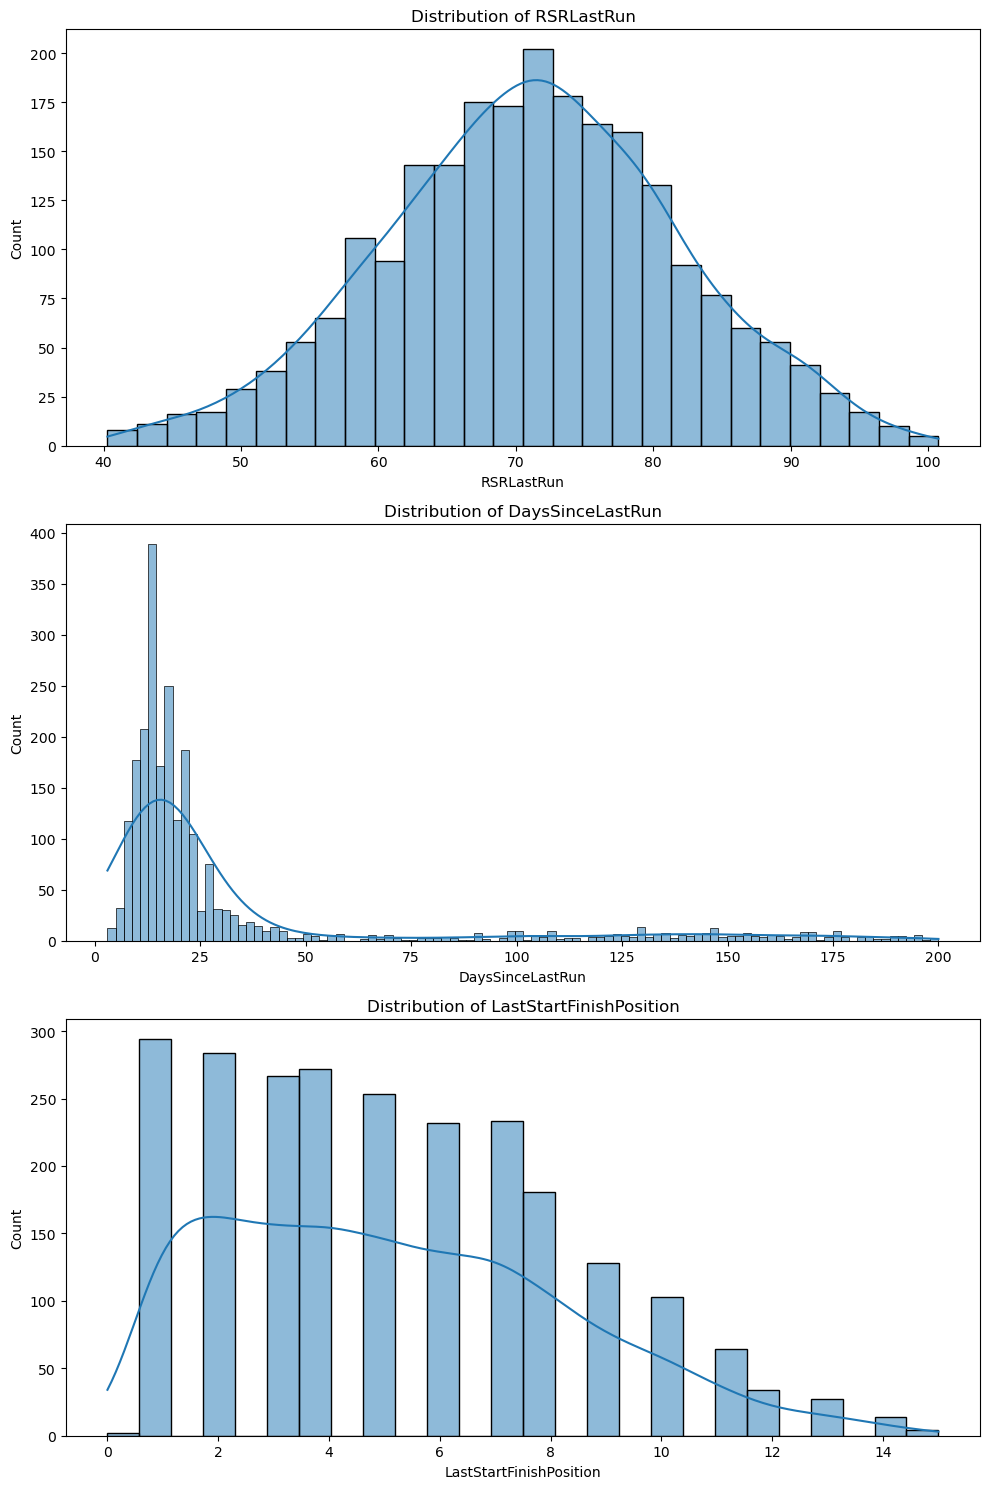

In [128]:
# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the distribution of RSRLastRun
sns.histplot(data_cleaned_final['RSRLastRun'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of RSRLastRun')

# Plot the distribution of DaysSinceLastRun
sns.histplot(data_cleaned_final['DaysSinceLastRun'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of DaysSinceLastRun')

# Plot the distribution of LastStartFinishPosition
sns.histplot(data_cleaned_final['LastStartFinishPosition'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of LastStartFinishPosition')

# Adjust layout
plt.tight_layout()
plt.show()

#### Distribution of RSR Last run:
As we can see from the first plot, the distribution of this coloumn shows that the distribution is normal/symmteric. For such a distribution, the best method to replace the NULL values is to replace by mean values. This ensures that the distrubtion of the data is not effected while replacing the null values. 

In [129]:
# Replacing the NULL values in the RSR colomn using the mean value
mean_value = data_cleaned_final['RSRLastRun'].mean()
data_cleaned_final['RSRLastRun'].fillna(mean_value, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_21868\827102663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_final['RSRLastRun'].fillna(mean_value, inplace=True)


#### Distribution of Days Since Last run:
As we can see from the first plot, the distribution of this coloumn shows that the distribution is skewed positively. For such a distribution, the best method to replace the NULL values is to replace by median values. This ensures that the distrubtion of the data is not effected while replacing the null values. Hene we will replace the NULL values in the coloumn "DaysSinceLastRun" using the median values

In [130]:
# Removing the NULL values in DaysSinceLastRun coloumn using the median due to skewness
median_value = data_cleaned_final['DaysSinceLastRun'].median()
data_cleaned_final['DaysSinceLastRun'].fillna(median_value, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_21868\3567269621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_final['DaysSinceLastRun'].fillna(median_value, inplace=True)


#### Distribution of Last Start FInish Position:
The distribution of this coloumn has not changed after removing the outliers in the data. Hence a forward filling approach as stated above would be a suitable approach in this case to deal with the NULL values in this coloumn.

In [131]:
# Using forward fill for replacing the NULL values in LastStartFinishPosition as no particular shape is observed
data_cleaned_final['LastStartFinishPosition'].fillna(method='ffill', inplace=True)
data_cleaned_final.isnull().sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_21868\2275188689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_final['LastStartFinishPosition'].fillna(method='ffill', inplace=True)


Date                       0
Track                      0
RaceNumber                 0
HorseNumber                0
HorseName                  0
Weight                     0
RSRLastRun                 0
Barrier                    0
Jockey                     0
Odds                       0
Trainer                    0
RunsFromSpell              0
DaysSinceLastRun           0
LastStartFinishPosition    0
Distance                   0
Age                        0
Starts                     0
FinishPosition             0
RSR                        0
dtype: int64

As from the above output, we can see that no coloumn in the dataset has NULL values in it. We can proceed further now for encoding the values for categorical variables

### 2.2.4 Encoding categorical variables
In this analysis, we have utilized ordinal encoding for the categorical columns like 'Track', 'Jockey', 'Trainer', and 'HorseName'. Ordinal encoding is a technique used to convert categorical variables into numerical values while preserving the ordinal relationship among categories.

For each of the specified columns, we assigned a unique numerical label to each category based on their order or frequency. This transformation allows us to incorporate categorical data into machine learning models that require numerical inputs, such as decision trees or logistic regression.

Once the encoding is applied, the categorical columns are transformed into numerical features, enabling us to include them in our predictive modeling pipeline effectively.

In [132]:
# Using ordinal encoder for this purpose
ordinal_encoder = OrdinalEncoder()

# Selecting the columns to be encoded
columns_to_encode = ['Track','Jockey', 'Trainer','HorseName']

# Fit and transform the selected columns
data_encoded = data_cleaned_final.copy()  # Make a copy to avoid modifying the original DataFrame
data_encoded[columns_to_encode] = ordinal_encoder.fit_transform(data_cleaned_final[columns_to_encode])

# Create a mapping dictionary for saving the categories just for future references
encoding_mapping = {}
for i, column in enumerate(columns_to_encode):
    encoding_mapping[column] = {idx: category for idx, category in enumerate(ordinal_encoder.categories_[i])}
    
# Printing the head of the data
data_encoded.head()


,Date,Track,RaceNumber,HorseNumber,HorseName,Weight,RSRLastRun,Barrier,Jockey,Odds,Trainer,RunsFromSpell,DaysSinceLastRun,LastStartFinishPosition,Distance,Age,Starts,FinishPosition,RSR
0,7/11/2023,1.0,1,1,822.0,58.5,68.133333,3,252.0,3.1,889.0,0,110.0,9.0,1000,4,5,3,76.975
1,7/11/2023,1.0,1,2,181.0,59.0,72.825000,2,183.0,5.0,889.0,3,13.0,4.0,1000,4,9,1,83.700
2,7/11/2023,1.0,1,3,537.0,59.0,64.000000,4,88.0,12.0,113.0,0,90.0,8.0,1000,4,8,6,75.175
3,7/11/2023,1.0,1,4,1816.0,58.5,65.350000,1,372.0,13.0,868.0,5,19.0,5.0,1000,4,7,4,75.050
4,7/11/2023,1.0,1,5,594.0,57.5,61.495833,5,85.0,3.3,464.0,0,143.0,8.0,1000,3,3,5,74.250


The values have been encoded as shown in the table above. We will be dropping the "Date" coloumn in the dataset as it has no significant meaning towards the predictive analysis. Moreover we will drop the "FinishPosition" coloumn as well as it is not the target coloumn for our analysis.

In [133]:
# Dropping the data and horse name as they dont have significant meaning in the data set
data_encoded.drop(columns=["Date","FinishPosition"], inplace=True)

The final shape of the data is now as below with all the data cleaning.

In [135]:
data_encoded.head()

,Track,RaceNumber,HorseNumber,HorseName,Weight,RSRLastRun,Barrier,Jockey,Odds,Trainer,RunsFromSpell,DaysSinceLastRun,LastStartFinishPosition,Distance,Age,Starts,RSR
0,1.0,1,1,822.0,58.5,68.133333,3,252.0,3.1,889.0,0,110.0,9.0,1000,4,5,76.975
1,1.0,1,2,181.0,59.0,72.825000,2,183.0,5.0,889.0,3,13.0,4.0,1000,4,9,83.700
2,1.0,1,3,537.0,59.0,64.000000,4,88.0,12.0,113.0,0,90.0,8.0,1000,4,8,75.175
3,1.0,1,4,1816.0,58.5,65.350000,1,372.0,13.0,868.0,5,19.0,5.0,1000,4,7,75.050
4,1.0,1,5,594.0,57.5,61.495833,5,85.0,3.3,464.0,0,143.0,8.0,1000,3,3,74.250


# 3. Choosing a suitable model and feature set
In this analysis, we aim to predict the Rating Standardized over Races (RSR) value, which serves as a measure of a horse's performance against historical averages. To achieve this, we have selected regression as the suitable technique, as it allows us to model the relationship between predictor variables and the continuous target variable, RSR.

We will employ following three regression algorithms and will compare the performance of each model respectively. The reason for choosing these models is given as below

__Linear Regression__: Linear regression is a simple yet powerful technique that models the linear relationship between the predictor variables and the target variable. It assumes that the relationship between the variables can be represented by a straight line and seeks to minimize the sum of squared differences between the observed and predicted values. Linear regression provides interpretable coefficients for each predictor variable, allowing us to understand the direction and magnitude of their impact on the target variable.

__K-Nearest Neighbors (KNN) Regression__: KNN regression is a non-parametric algorithm that predicts the target variable by averaging the values of its k-nearest neighbors in the feature space. Unlike linear regression, KNN regression does not assume a specific functional form for the relationship between the variables and can capture complex patterns in the data. However, it requires careful selection of the hyperparameter k, the number of neighbors to consider, and may suffer from computational inefficiency with large datasets.

__Random Forest Regression__: Random Forest Regression is an ensemble learning method that combines multiple decision trees to make predictions. It aggregates the predictions of individual trees to reduce overfitting and improve generalization performance. Random forests are robust to outliers and non-linear relationships and can handle large datasets efficiently. Additionally, they provide feature importance scores, allowing us to identify the most influential predictors in predicting RSR values.


## 3.1 Feature Selection
In our analysis, selecting appropriate features is crucial for building accurate and interpretable regression models. To identify potential predictors for our Linear Regression model, we utilized the correlation matrix to explore the relationships between the features and the target variable, RSR (Rating Standardized over Races).

Following code calculates the co-relation matrix of the data which is then visualised using the heat map

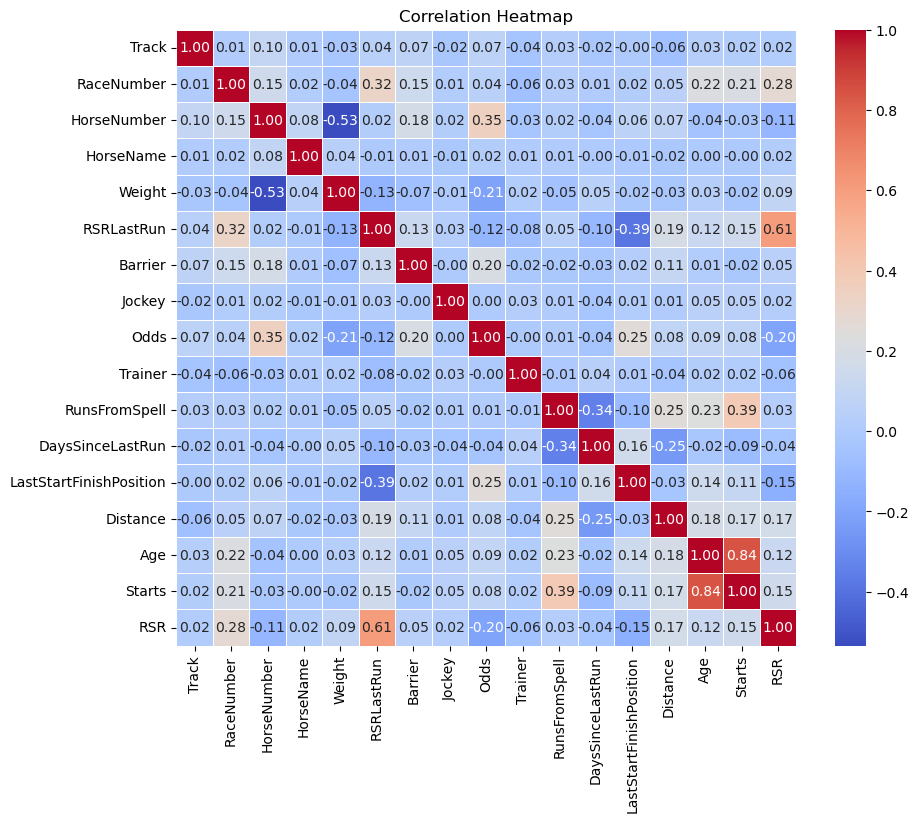

In [101]:
# Calculating co-relation for choosing the right features
corr_matrix = data_encoded.corr()

# Creating heat map to better visualise the co-related features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation matrix, we selected features that exhibit a relatively high correlation with the target variable, RSR. These features are likely to have a significant impact on predicting RSR values and are thus considered as potential predictors for our Linear Regression model.

Furthermore, we also considered domain knowledge and practical relevance when selecting features. Features such as horse characteristics (e.g., age, weight), past performance indicators (e.g., RSRLastRun, LastStartFinishPosition), and race conditions (e.g., track, distance) were deemed relevant factors that could influence a horse's RSR value.

## 3.2 Simple Linear Regression Model

In this analysis, I employed the scikit-learn library to fit our regression models and evaluate their performance. To ensure unbiased performance estimates, I divided our dataset into training and testing subsets. The training set was used to train the regression models, while the testing set served as an independent dataset for evaluating model performance.

In [145]:
y = data_encoded['RSR']
X = data_encoded[['RSRLastRun','Age','Jockey','Trainer','LastStartFinishPosition','Odds','RaceNumber','DaysSinceLastRun']]
#X = data_encoded.drop(columns=['RSR'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions
y_pred = linear_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", mse)
print("R-squared (R2) Value:", r2)


Root Mean Squared Error: 8.647619436916644
R-squared (R2) Value: 0.3675980937696287


### 3.2.1 Evaluating Linear Regression model
The Root Mean Squared Error (RMSE) of  regression model is approximately 8.65, indicating that, on average, the model's predictions deviate from the actual RSR values by approximately 8.65 units.

The R-squared (R2) value of the model is approximately 0.368, which means that approximately 36.8% of the variance in the RSR values is explained by the regression model.

While an R2 value of 0.368 indicates that the model explains a moderate portion of the variability in the RSR values, there is still room for improvement. Similarly, an RMSE of 8.65 suggests that there is some prediction error that could be reduced through further model refinement or the inclusion of additional relevant features.

## 3.3 Random Forest Regression Model

In my analysis, I have employed the Random Forest Regression model to predict the Rating Standardized over Races (RSR) values. Random Forest Regression is an ensemble learning method that combines multiple decision trees to make predictions. By leveraging the power of ensemble learning, Random Forest Regression can capture complex relationships and interactions between predictor variables, leading to more accurate and robust predictions.

For this model, I have utilized all available features in my dataset as the feature set. By including all features, I aim to capture the full variability and richness of the data, allowing the Random Forest Regression model to exploit the collective information contained in the features to make accurate predictions of RSR values.

The Random Forest Regression model is well-suited for handling high-dimensional datasets with many features, as it can automatically select the most informative features and mitigate the risk of overfitting. Additionally, Random Forest Regression provides insights into feature importance, allowing me to identify the key predictors that have the greatest impact on predicting RSR values.

In [150]:
y = data_encoded['RSR']
X = data_encoded.drop(columns=['RSR'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees with n_estimators

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluating the model
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
test_r2 = r2_score(y_test, y_pred_test)

print("Root Mean Squared Error RMSE:", test_rmse)
print("R-squared  R^2:", test_r2)

Root Mean Squared Error RMSE: 8.182142721642448
R-squared  R^2: 0.4338465819301609


### 3.3.1 Evaluating Random Forest Regression model
The test Root Mean Squared Error (RMSE) of the Random Forest Regression model is approximately 8.18, indicating that, on average, the model's predictions deviate from the actual RSR values by approximately 8.18 units.

The test R-squared (R2) value of the model is approximately 0.434, which means that approximately 43.4% of the variance in the RSR values is explained by the Random Forest Regression model.

These evaluation metrics suggest that the Random Forest Regression model performs slightly better than the previous Linear Regression model, with a lower RMSE and a higher R-squared value. However, there is still room for improvement in predictive accuracy.

## 3.4 KNN Regressor model
In my analysis, I employed the K-Nearest Neighbors (KNN) Regressor model to predict the Rating Standardized over Races (RSR) values. KNN Regressor is a non-parametric algorithm that predicts the target variable by averaging the values of its k-nearest neighbors in the feature space.

Before fitting the KNN Regressor model, I performed hyperparameter tuning to determine the optimal value of the hyperparameter k, which represents the number of nearest neighbors to consider when making predictions. I utilized techniques such as grid search or randomized search to search through a range of possible values for k

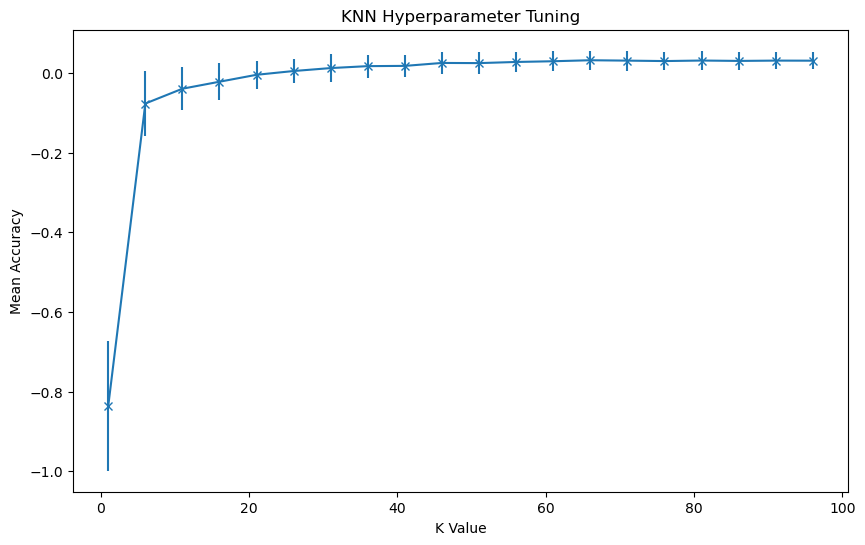

Best K Value: 66
Accuracy score for the best K value: 0.03151246460000347


In [154]:
k_arr = list(range(1,100,5))
k_values = {'n_neighbors': k_arr}

k_model_cv = KNeighborsRegressor()

grid = GridSearchCV(k_model_cv,k_values,cv=10)
grid.fit(X_train,y_train)

mean_score = grid.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.errorbar(k_arr, grid.cv_results_['mean_test_score'], yerr=grid.cv_results_['std_test_score'], marker='x',label='Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.show()

print("Best K Value:", grid.best_params_['n_neighbors'])
print("Accuracy score for the best K value:", grid.best_score_)

After identifying the best value of k through hyperparameter tuning, I fit the KNN Regressor model using this optimal value. The model was trained on the training data, where it learned the relationships between the predictor variables and the target variable, RSR. Once trained, the model was evaluated using the testing data to assess its predictive performance.

In [152]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=66) # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Making predictions
y_pred = knn_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred,squared=False)
print("Root Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Value:", r2)

Root Mean Squared Error: 10.908007152378202
R-squared (R2) Value: -0.006215169582012292


### 3.4.1 Evaluating KNN regressor model
The Root Mean Squared Error (RMSE) of the K-Nearest Neighbors (KNN) Regressor model with the best value of k is approximately 10.91. This indicates that, on average, the model's predictions deviate from the actual RSR values by approximately 10.91 units.

The R-squared (R2) value of the model is approximately -0.006, which means that the model explains a negligible amount of the variance in the RSR values. A negative R2 value suggests that the model performs worse than a horizontal line fitting the data, indicating poor performance.

These evaluation metrics indicate that the KNN Regressor model with the selected hyperparameter tuning did not perform well in predicting the RSR values. The RMSE is relatively high, and the R2 value is negative, indicating that the model's predictions are not accurate and do not capture the variability in the RSR values.

# 4. Conclusion

After evaluating the three regression models – Linear Regression, Random Forest Regression, and K-Nearest Neighbors (KNN) Regression – based on their performance metrics, including Root Mean Squared Error (RMSE) and R-squared (R2) value, we can draw the following conclusions:

__Linear Regression__:

    RMSE: 8.65
    R2 Value: 0.368
    
__Random Forest Regression__:

    RMSE: 8.18
    R2 Value: 0.434

__KNN Regression__:

    RMSE: 10.91
    R2 Value: -0.006

Based on these results, the Random Forest Regression model outperforms the other models, with the lowest RMSE and the highest R2 value. This indicates that the Random Forest Regression model provides the most accurate predictions of the Rating Standardized over Races (RSR) values and explains a larger portion of the variance in the data compared to the other models.

## 4.1 Obstacles faced and methods adapted
In the course of our predictive modeling for RSR values, we've identified several potential obstacles that may impede our progress. Here's how we plan to navigate them:

__Data Quality Concerns__: To tackle issues related to data quality, such as missing values and outliers, we've implemented stringent data cleaning and preprocessing protocols. This involves techniques like imputation for missing values, outlier detection, and rigorous validation checks to ensure the integrity of our dataset.

__Feature Selection and Engineering Challenges__: Addressing the complexity of feature selection and engineering, we've conducted extensive exploratory data analysis to pinpoint relevant features.

__Balancing Model Complexity and Interpretability__: Striking a balance between model complexity and interpretability, we've evaluated a range of modeling techniques, from simpler models like Linear Regression to more complex ones such as Random Forest Regression. This allows us to weigh the trade-offs between predictive performance and model interpretability effectively.

__Mitigating Overfitting and Underfitting__: To mitigate the risks of overfitting and underfitting, we've employed strategies like regularization and cross-validation. By carefully tuning model parameters and evaluating performance metrics across various validation sets, we aim to ensure that our models generalize well to unseen data.

__Areas for future Improvement__:
Moving forward, we can deepen collaborate with domain experts and stakeholders to gain further insights into the intricacies of horse racing dynamics. By actively involving them in the modeling process and soliciting their feedback, we can refine our models to better align with the nuances of the domain.